In [1]:
#pip install opencv-python

In [2]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [3]:
# Load images
# ==============================================================================

# Image with only one face
image_1 = Image.open('images/image_1.jpg')

# Image with multiple faces
image_2 = Image.open('images/image_2.png')

# image_1 = cv2.imread('images/image_1.jpg')
# image_2 = cv2.imread('images/image_2.png')

In [4]:
type(image_1)
image_1.__dict__.keys()

dict_keys(['im', 'mode', '_size', 'palette', 'info', '_category', 'readonly', 'pyaccess', '_exif', '_min_frame', 'custom_mimetype', 'tile', 'decoderconfig', 'decodermaxblock', 'fp', 'filename', '_exclusive_fp', 'bits', 'layers', 'layer', 'huffman_dc', 'huffman_ac', 'quantization', 'app', 'applist', 'icclist'])

In [5]:
print(" size  : ", image_1.size )
print(" tile  : ", image_1.tile )
print(" layer  : ",  image_1.layer )

 size  :  (726, 712)
 tile  :  [('jpeg', (0, 0, 726, 712), 0, ('RGB', ''))]
 layer  :  [(1, 2, 2, 0), (2, 1, 1, 1), (3, 1, 1, 1)]


In [6]:
print(" size  : ", image_2.size )
print(" tile  : ", image_2.tile )
print(" layer  : ",  image_2.layer )

 size  :  (1200, 800)
 tile  :  [('jpeg', (0, 0, 1200, 800), 0, ('RGB', ''))]
 layer  :  [(1, 2, 2, 0), (2, 1, 1, 1), (3, 1, 1, 1)]


# Show images

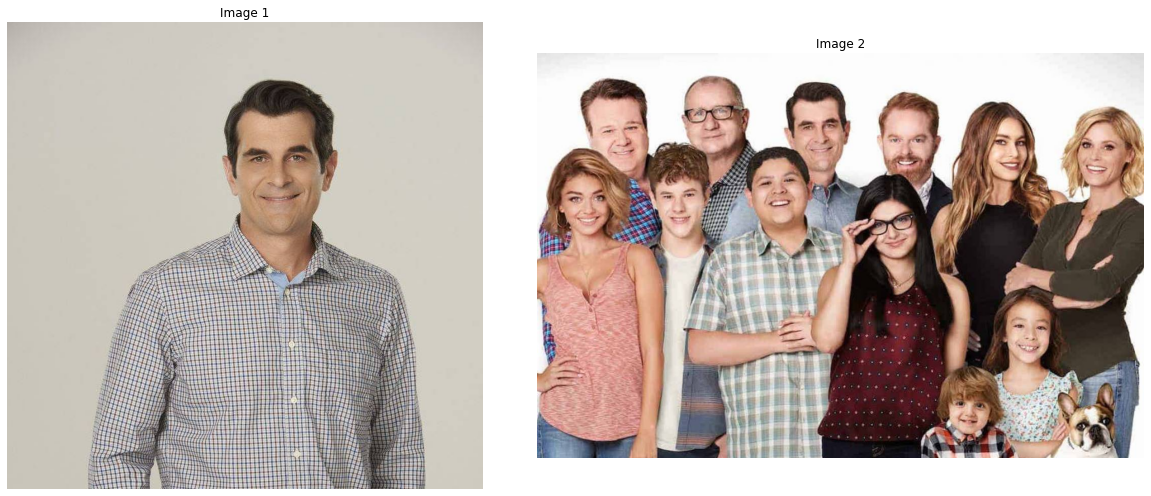

In [7]:
# Plot the original and the compressed image.
fig, ax = plt.subplots(1, 2, figsize = (17, 7))
ax[0].imshow(image_1)
ax[0].set_title('Image 1')
ax[1].imshow(image_2)
ax[1].set_title('Image 2')

for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

# Detect faces with MTCNN

In [8]:
#pip install torch

In [9]:
#pip install facenet_pytorch

In [10]:
import torch
from facenet_pytorch import MTCNN
import numpy as np

# Detect if GPU cuda exists
# ==============================================================================
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

# Detector MTCNN
# ==============================================================================
mtcnn = MTCNN(
            select_largest = True,
            min_face_size  = 20,
            thresholds     = [0.6, 0.7, 0.7],
            post_process   = False,
            image_size     = 160,
            device         = device
        )


Running on device: cpu


## One face per image

In [11]:

# Detection of bounding box y landmarks
# ==============================================================================
boxes, probs, landmarks = mtcnn.detect(image_1, landmarks=True)
print('Bounding boxes:', boxes)
print('Probability:', probs)
print('landmarks:', landmarks)

Bounding boxes: [[345.59943 138.98276 476.69604 315.00348]]
Probability: [0.99998987]
landmarks: [[[383.51898 209.40923]
  [443.04208 206.6979 ]
  [417.08655 243.09335]
  [387.46637 267.13293]
  [445.92215 265.3023 ]]]


In [12]:
boxes[0]

array([345.59943, 138.98276, 476.69604, 315.00348], dtype=float32)

In [13]:
landmarks[0]

array([[383.51898, 209.40923],
       [443.04208, 206.6979 ],
       [417.08655, 243.09335],
       [387.46637, 267.13293],
       [445.92215, 265.3023 ]], dtype=float32)

# Plot

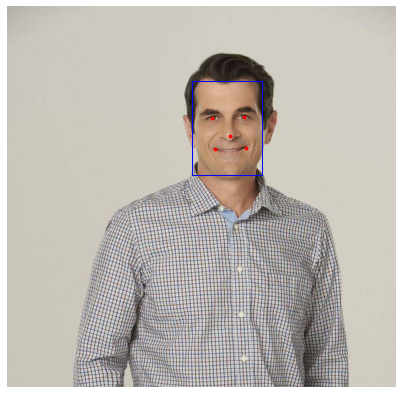

In [14]:
# Plot  matplotlib
# ==============================================================================
# (0,0) is the top left corner of an image
box = boxes[0]
landmark = landmarks[0]
fig, ax  = plt.subplots(figsize=(9, 7))

ax.imshow(image_1)

ax.scatter(landmark[:, 0], landmark[:, 1],
           s=8, c= 'red')

rect = plt.Rectangle(
            xy     = (box[0], box[1]),
            width  = box[2] - box[0],
            height = box[3] - box[1],
            fill   = False,
            color  = 'blue'
       )
ax.add_patch(rect)
ax.axis('off');
# 

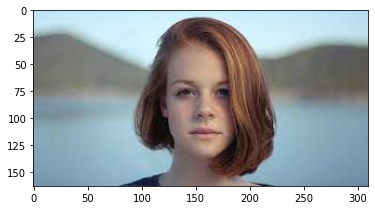

In [15]:
image_face = Image.open('images/face.jpeg')

plt.imshow(image_face);

In [16]:
print(" size  : ", image_face.size )
print(" tile  : ", image_face.tile )
print(" layer  : ",  image_face.layer )

 size  :  (310, 163)
 tile  :  []
 layer  :  [(1, 2, 2, 0), (2, 1, 1, 1), (3, 1, 1, 1)]


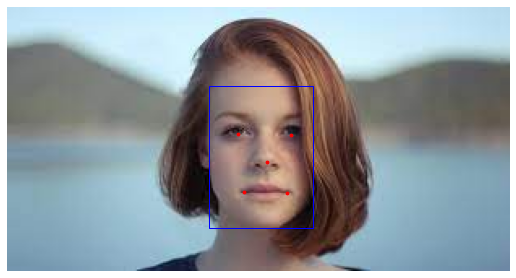

In [17]:
# Detection of bounding box y landmarks
# ==============================================================================
image_path = Image.open('images/face.jpeg')

boxes, probs, landmarks = mtcnn.detect(image_path, landmarks=True)

# Plot  matplotlib
# ==============================================================================
# (0,0) is the top left corner of an image
box = boxes[0]
landmark = landmarks[0]
fig, ax  = plt.subplots(figsize=(9, 7))

ax.imshow(image_path)

ax.scatter(landmark[:, 0], landmark[:, 1],
           s=8, c= 'red')

rect = plt.Rectangle(
            xy     = (box[0], box[1]),
            width  = box[2] - box[0],
            height = box[3] - box[1],
            fill   = False,
            color  = 'blue'
       )
ax.add_patch(rect)
ax.axis('off');
# 

## Multiple faces per image

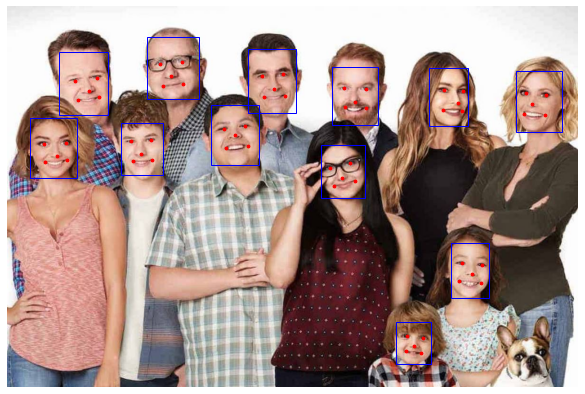

In [18]:
image_path = Image.open('images/image_2.png')

# Detection of bounding box y landmarks
# ==============================================================================
boxes, probs, landmarks = mtcnn.detect(image_path, landmarks=True)

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(image_path)

for box, landmark in zip(boxes, landmarks):
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
    rect = plt.Rectangle(
                xy     = (box[0], box[1]),
                width  = box[2] - box[0],
                height = box[3] - box[1],
                fill   = False,
                color  = 'blue'
           )
    ax.add_patch(rect)
    
ax.axis('off');

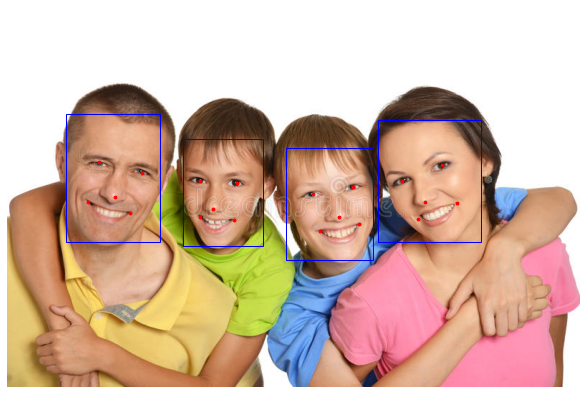

In [19]:
image_path = Image.open('images/family.jpeg')

# Detection of bounding box y landmarks
# ==============================================================================
boxes, probs, landmarks = mtcnn.detect(image_path, landmarks=True)

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(image_path)

for box, landmark in zip(boxes, landmarks):
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
    rect = plt.Rectangle(
                xy     = (box[0], box[1]),
                width  = box[2] - box[0],
                height = box[3] - box[1],
                fill   = False,
                color  = 'blue'
           )
    ax.add_patch(rect)
    
ax.axis('off');

# Extract faces, with mtcnn.forward.permute()

## One face

In [110]:
# Detect faces
# ==============================================================================
extract_image1 = mtcnn.forward(image_1)

extract_image_face = mtcnn.forward(image_face)

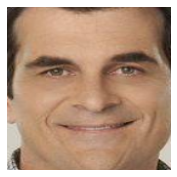

In [106]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
extract_image1 = extract_image1.permute(1, 2, 0).int().numpy()
ax.imshow(extract_image1)
plt.axis('off');

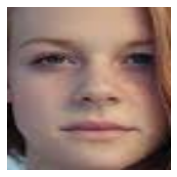

In [108]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
extract_image_face = extract_image_face.permute(1, 2, 0).int().numpy()
ax.imshow(extract_image_face)
plt.axis('off');

## Multiple faces

In [111]:

# Detector MTCNN
# ==============================================================================
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )

# Detección de caras
# ==============================================================================
extract_image2 = mtcnn.forward(image_2) # there are 12 faces

image_family = Image.open('images/family.jpeg')
extract_image_family = mtcnn.forward(image_family) # there are 4 faces

In [112]:
extract_image2.shape, extract_image_family.shape

(torch.Size([12, 3, 160, 160]), torch.Size([4, 3, 160, 160]))

In [113]:
print(" There are ", extract_image2.shape[0], " faces in the image.")
print(" There are ", extract_image_family.shape[0], " faces in the image.")

 There are  12  faces in the image.
 There are  4  faces in the image.


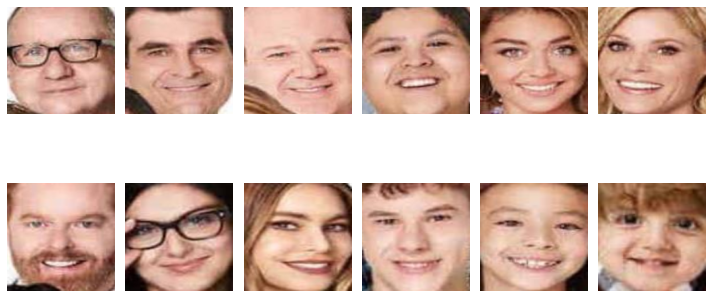

In [114]:
# Plot
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(10, 6))
axs= axs.flatten()

for i in range(extract_image2.shape[0]):
    face = extract_image2[i,:,:,:].permute(1, 2, 0).int().numpy()
    axs[i].imshow(face)
    axs[i].axis('off')
    
plt.tight_layout();

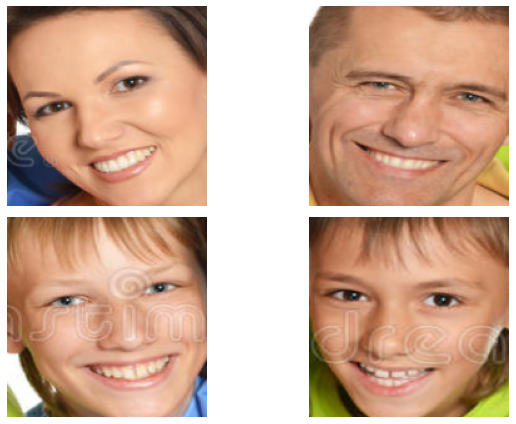

In [116]:
# Representación con matplotlib
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axs= axs.flatten()

for i in range(extract_image_family.shape[0]):
    face = extract_image_family[i,:,:,:].permute(1, 2, 0).int().numpy()
    axs[i].imshow(face)
    axs[i].axis('off')
    
plt.tight_layout();

# Extract faces, with mtcnn.detect (bounding)

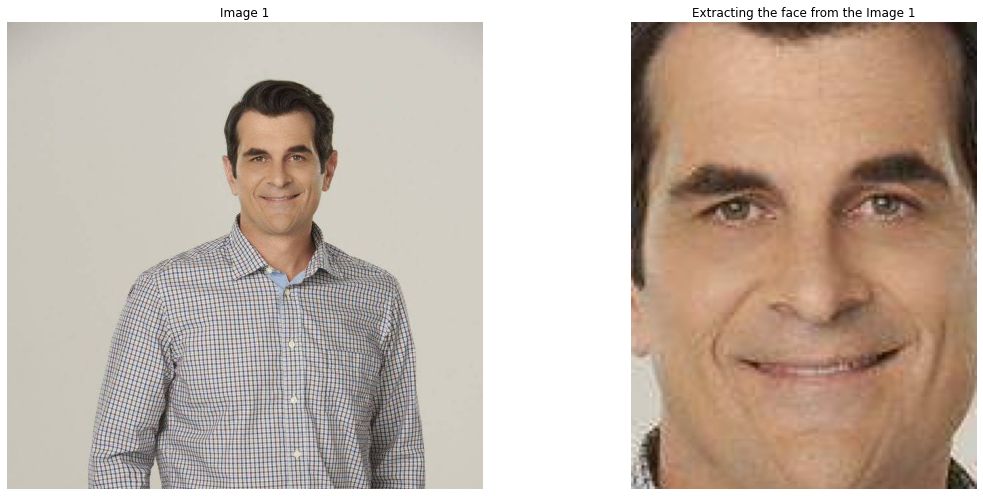

In [118]:
# Extract faces
# ==============================================================================
boxes, probs, landmarks = mtcnn.detect(image_1, landmarks=True)
x1, y1, x2, y2 = boxes[0].astype(int)
face = np.array(image_1)[y1:y2, x1:x2]


fig, ax = plt.subplots(1, 2, figsize = (17, 7))
ax[0].imshow(image_1)
ax[0].set_title('Image 1')
ax[1].imshow(face)
ax[1].set_title('Extracting the face from the Image 1')

for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()


In [ ]:
# (END)